# Airbnb - Random Forests

In [5]:
#decision tree template
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data sourced from Inside Airbnb (http://insideairbnb.com/get-the-data.html)
# A million thanks to Murray Cox
# Pre-processed with dimensionality reduction
abnb = pd.read_csv("abnb_listings_rdcd.csv")
del abnb["Unnamed: 0"]
abnb.rename(columns={'review_scores_rating': 'rating'}, inplace=True)

In [6]:
abnb.head()

,id,latitude,longitude,location,description,space,price,host,rating,reviews_per_month
0,1162609,37.785217,-122.488655,11.875956,Lovely One Bedroom Apartment This is a big wel...,-1.319244,386.666667,1,89,0.28
1,6938818,37.781505,-122.504754,11.875956,Best Secret in Town Convenience is the key for...,-1.416978,142.333333,1,92,2.33
2,4781448,37.781797,-122.492492,11.875955,3 Bd 2.5 Ba Full Flat Condo w Views Our family...,5.781405,940.000000,1,100,0.36
3,1931937,37.781564,-122.494424,11.875955,Blocks from GG Park & Ocean Beach Large 2BD ap...,-1.404158,136.666667,1,94,1.13
4,2134100,37.783888,-122.508557,11.875958,Ocean Beach hilltop cottage Newly built cottag...,-1.582193,178.333333,1,92,6.09


In [7]:
feature_cols = ['location', 'space', 'price', 'host', 'rating']
X = abnb[feature_cols]
y = abnb.reviews_per_month

In [8]:
# instantiate a RandomForestRegressor (with random_state=1)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)

In [21]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn import cross_validation
scores = cross_validation.cross_val_score(rfr, X, y, cv=14, scoring="mean_squared_error")
np.mean(-scores)

2.5192566954926918

In [22]:
# try different max_depth values one-by-one
# What are their cross_val_score's?
depths, rmses = [], []
for depth in range(1,6):
    rfr = RandomForestRegressor(random_state=1, max_depth=depth)
    scores = cross_validation.cross_val_score(rfr, X, y, cv=14, scoring="mean_squared_error")
    depths.append(depth)
    rmses.append(np.mean(-scores))
    print depth, np.mean(-scores)

1 2.81598572069
2 2.68033912926
3 2.57397899076
4 2.51925669549
5 2.50866757813


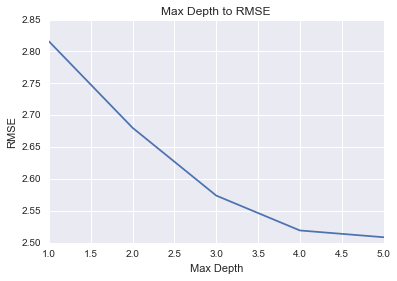

In [23]:
# Plot max_depth (x-axis) versus RMSE (y-axis)
# What's a good depth?
plt.plot(depths, rmses)
plt.xlabel("Max Depth")
plt.ylabel("RMSE")
plt.title("Max Depth to RMSE")

In [24]:
# max_depth=? was best, so fit a tree using that parameter
rfr = RandomForestRegressor(random_state=1, max_depth=4)
treereg = rfr.fit(X, y)

In [25]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,location,0.021958
1,space,0.027085
2,price,0.241768
3,host,0.242560
4,rating,0.466630


In [26]:
# classification tree
# what is y?
y_class = abnb.reviews_per_month > 3

In [27]:
# fit a classification tree with max_depth=5 on all data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, max_depth=4)
treeclf = rfc.fit(X, y_class)

In [28]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,location,0.044341
1,space,0.083869
2,price,0.243687
3,host,0.278754
4,rating,0.349349
